
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
---

<p style="text-align: center;">
<img src=http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg width=40%>
</p>

 Universidad Nacional de Córdoba

---

## Practico: Aprendizaje No Supervisado

### Importación de librerías 

In [106]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Lectura del dataset

In [46]:
df_orig = pd.read_parquet("preprocesado_no_supervisado.parquet")

In [10]:
df = df_orig.copy()

In [11]:
df

,dni_titular_movimiento,anio_mes_cupon,client_edad,client_antig,client_domicilio_codigo_postal,trans__x0_AV,trans__x0_AX,trans__x0_EX,trans__x0_MC,trans__x0_PC,...,fg_aumentado,o_mes,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad,geodist_cp
0,000000b5aea2c9ea7cc155f6ebcef97f826,202007,47.0,224.0,3000,0.0,0.0,0.0,0.0,0.0,...,0,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,329.37
1,000000b5aea2c9ea7cc155f6ebcef97f826,202008,47.0,225.0,3000,0.0,0.0,0.0,0.0,0.0,...,0,1,3.58,3.84,3.68,3.60,4.0,3.75,3.79,329.37
2,000000b5aea2c9ea7cc155f6ebcef97f826,202009,47.0,226.0,3000,0.0,0.0,0.0,0.0,0.0,...,0,2,3.58,3.84,3.68,3.60,4.0,3.75,3.79,329.37
3,000000b5aea2c9ea7cc155f6ebcef97f826,202010,47.0,227.0,3000,0.0,0.0,0.0,0.0,0.0,...,0,3,3.58,3.84,3.68,3.60,4.0,3.75,3.79,329.37
4,000000b5aea2c9ea7cc155f6ebcef97f826,202011,47.0,228.0,3000,0.0,0.0,0.0,0.0,0.0,...,0,4,3.58,3.84,3.68,3.60,4.0,3.75,3.79,329.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,202102,31.0,64.0,4650,0.0,0.0,0.0,0.0,0.0,...,1,7,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1048.33
10124,000ef071e95351afc1149fa1afe4862a079,202103,31.0,65.0,4650,0.0,0.0,0.0,0.0,0.0,...,0,8,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1048.33
10125,000ef071e95351afc1149fa1afe4862a079,202104,31.0,66.0,4650,0.0,0.0,0.0,0.0,0.0,...,0,9,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1048.33
10126,000ef071e95351afc1149fa1afe4862a079,202105,31.0,67.0,4650,0.0,0.0,0.0,0.0,0.0,...,1,10,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1048.33


In [15]:
df = df.drop(columns = ['anio_mes_cupon', 'client_edad', 'client_domicilio_codigo_postal'])

In [16]:
df.columns

Index(['dni_titular_movimiento', 'client_antig', 'trans__x0_AV',
       'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC', 'trans__x0_PC',
       'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP', 'trans__x0_SM',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacional', 'trans__x1_Naranja',
       'trans__x1_Naranja_virtual', 'trans__x1_Visa_internacional',
       'trans__x2_Dolares', 'trans__x2_Pesos', 'trans__x2_Zeta', 'trans__x3_0',
       'trans__x3_1', 'trans__x3_2', 'trans__x3_3', 'trans__x3_4',
       'trans__x3_5', 'trans__x3_6', 'trans__x3_7', 'trans__x3_8',
       'trans__x3_9', 'monto_ajustado', 'fg_aumentado', 'o_mes', 'mean_cargo',
       'mean_sexo', 'mean_est_civil', 'mean_reg', 'mean_nivel_estud',
       'mean_est_viv', 'mean_edad', 'geodist_cp'],
      dtype='object')

### Normalización de Atributos y PCA

In [61]:
# Preprocessing
features = df.columns
dni = 'dni_titular_movimiento'
target = 'fg_aumentado'

features = features[(features != dni) & (features != target)]
features = [g for g in features if 'mean_' not in g]

In [82]:
len(features)

35

In [71]:
#pca = PCA(n_components=min(20, df.shape[1]))
scaler = StandardScaler()
pca = PCA(n_components=None)

In [72]:
# Fit
model = Pipeline([
  ('scaler', scaler),
  ('pca', pca),
])

pca_result = model.fit_transform(df[features])

In [73]:
pca_result.shape

(10128, 35)

In [74]:
model['pca'].explained_variance_ratio_.round(2)

array([0.2 , 0.08, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

<AxesSubplot:title={'center':'Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n'}>

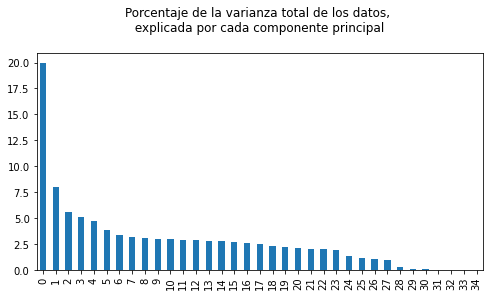

In [75]:
plt.figure(figsize=(8,4))
plt.title("Porcentaje de la varianza total de los datos, \n explicada por cada componente principal \n")
pd.Series(model['pca'].explained_variance_ratio_.round(6)*100).plot(kind='bar')

In [76]:
acc_variance_percent = np.cumsum(np.round(model['pca'].explained_variance_ratio_.round(2), decimals=4) * 100)
acc_variance_percent

array([ 20.,  28.,  34.,  39.,  44.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  86.,  88.,  90.,  92.,
        94.,  96.,  97.,  98.,  99., 100., 100., 100., 100., 100., 100.,
       100., 100.])

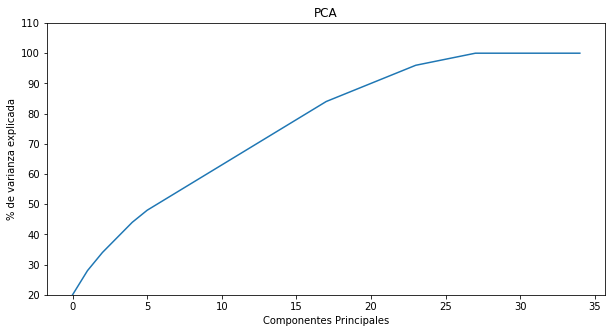

In [78]:
#plt.xticks(range(model['pca'].n_components))

plt.figure(figsize=(10, 5))
plt.ylabel('% de varianza explicada')
plt.xlabel('Componentes Principales')
plt.title('PCA')
plt.ylim(20, 110)
plt.xticks(model['pca'].n_components)
plt.plot(acc_variance_percent)

In [97]:
pca_cols = [f'pca_{x}' for x in range(1,16)]
df_pca_final = pd.DataFrame(pca_result[:,:15], columns = pca_cols)
df_pca_final

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,-2.251472,0.051066,-0.148895,-0.513030,0.137907,-0.838896,0.569449,-0.069805,-0.372449,0.491298,-0.190473,0.395694,-0.479255,0.525277,-1.232101
1,-1.938524,-0.032021,-0.098414,-0.208088,0.050483,-0.814305,0.644480,-0.202690,-0.312881,0.377221,-0.131161,0.348705,-0.405433,0.485619,-1.045256
2,-1.954612,-0.032581,-0.105265,-0.228509,0.052203,-0.815702,0.671645,-0.308521,-0.310460,0.287787,-0.090107,0.270136,-0.337289,0.430836,-0.848046
3,-1.970699,-0.033141,-0.112116,-0.248930,0.053924,-0.817099,0.698811,-0.414352,-0.308040,0.198354,-0.049053,0.191567,-0.269144,0.376053,-0.650836
4,-1.986786,-0.033701,-0.118966,-0.269352,0.055644,-0.818496,0.725977,-0.520183,-0.305620,0.108920,-0.007999,0.112998,-0.201000,0.321270,-0.453627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,4.484611,-2.010828,-0.290988,-1.125179,0.316396,0.726857,-2.006629,1.199783,-0.281344,-0.138167,-1.026748,-0.645678,0.382897,-1.777583,1.211200
10124,1.460202,-0.699214,0.362882,1.876127,-0.467461,0.681828,-1.131671,0.074023,-0.091613,-0.228246,-0.164620,-0.251761,0.330254,-0.431663,0.711188
10125,0.501371,-0.254380,0.338478,2.094330,-0.552888,0.887358,-0.679694,-0.470107,0.460187,-0.466860,0.153968,-0.094724,0.287951,0.146841,0.756862
10126,-0.952168,-0.059282,-0.030280,0.122009,-0.148933,2.871914,0.329423,1.786381,0.789267,-6.917620,6.012313,15.594830,-0.411569,-5.096588,4.459485


In [103]:
cols = [x for x in df.columns if x not in features]
df_sin_pca = df[cols] 
df_sin_pca

,dni_titular_movimiento,fg_aumentado,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad
0,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
1,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
2,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
3,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
4,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79
...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10124,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10125,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90
10126,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90


In [104]:
df_final = pd.merge(df_sin_pca, df_pca_final, left_index=True, right_index=True)
df_final

In [105]:
df_final

,dni_titular_movimiento,fg_aumentado,mean_cargo,mean_sexo,mean_est_civil,mean_reg,mean_nivel_estud,mean_est_viv,mean_edad,pca_1,...,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-2.251472,...,-0.838896,0.569449,-0.069805,-0.372449,0.491298,-0.190473,0.395694,-0.479255,0.525277,-1.232101
1,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.938524,...,-0.814305,0.644480,-0.202690,-0.312881,0.377221,-0.131161,0.348705,-0.405433,0.485619,-1.045256
2,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.954612,...,-0.815702,0.671645,-0.308521,-0.310460,0.287787,-0.090107,0.270136,-0.337289,0.430836,-0.848046
3,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.970699,...,-0.817099,0.698811,-0.414352,-0.308040,0.198354,-0.049053,0.191567,-0.269144,0.376053,-0.650836
4,000000b5aea2c9ea7cc155f6ebcef97f826,0,3.58,3.84,3.68,3.60,4.0,3.75,3.79,-1.986786,...,-0.818496,0.725977,-0.520183,-0.305620,0.108920,-0.007999,0.112998,-0.201000,0.321270,-0.453627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,4.484611,...,0.726857,-2.006629,1.199783,-0.281344,-0.138167,-1.026748,-0.645678,0.382897,-1.777583,1.211200
10124,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,1.460202,...,0.681828,-1.131671,0.074023,-0.091613,-0.228246,-0.164620,-0.251761,0.330254,-0.431663,0.711188
10125,000ef071e95351afc1149fa1afe4862a079,0,3.58,3.59,3.68,3.99,4.0,3.75,3.90,0.501371,...,0.887358,-0.679694,-0.470107,0.460187,-0.466860,0.153968,-0.094724,0.287951,0.146841,0.756862
10126,000ef071e95351afc1149fa1afe4862a079,1,3.58,3.59,3.68,3.99,4.0,3.75,3.90,-0.952168,...,2.871914,0.329423,1.786381,0.789267,-6.917620,6.012313,15.594830,-0.411569,-5.096588,4.459485


In [110]:
df_final.columns

Index(['dni_titular_movimiento', 'fg_aumentado', 'mean_cargo', 'mean_sexo',
       'mean_est_civil', 'mean_reg', 'mean_nivel_estud', 'mean_est_viv',
       'mean_edad', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6',
       'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13',
       'pca_14', 'pca_15'],
      dtype='object')

In [111]:
df.columns

Index(['dni_titular_movimiento', 'client_antig', 'trans__x0_AV',
       'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC', 'trans__x0_PC',
       'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP', 'trans__x0_SM',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacional', 'trans__x1_Naranja',
       'trans__x1_Naranja_virtual', 'trans__x1_Visa_internacional',
       'trans__x2_Dolares', 'trans__x2_Pesos', 'trans__x2_Zeta', 'trans__x3_0',
       'trans__x3_1', 'trans__x3_2', 'trans__x3_3', 'trans__x3_4',
       'trans__x3_5', 'trans__x3_6', 'trans__x3_7', 'trans__x3_8',
       'trans__x3_9', 'monto_ajustado', 'fg_aumentado', 'o_mes', 'mean_cargo',
       'mean_sexo', 'mean_est_civil', 'mean_reg', 'mean_nivel_estud',
       'mean_est_viv', 'mean_edad', 'geodist_cp'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10127
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dni_titular_movimiento          10128 non-null  object 
 1   client_antig                    10128 non-null  float64
 2   trans__x0_AV                    10128 non-null  float64
 3   trans__x0_AX                    10128 non-null  float64
 4   trans__x0_EX                    10128 non-null  float64
 5   trans__x0_MC                    10128 non-null  float64
 6   trans__x0_PC                    10128 non-null  float64
 7   trans__x0_PL                    10128 non-null  float64
 8   trans__x0_PN                    10128 non-null  float64
 9   trans__x0_PP                    10128 non-null  float64
 10  trans__x0_SM                    10128 non-null  float64
 11  trans__x0_TA                    10128 non-null  float64
 12  trans__x0_VI                    

### Visualización mediante t-distributed Stochastic Neighbor Embedding

In [125]:
df_tsne = df.drop(columns = [dni, target,'o_mes' ]).astype(np.float32)
df_tsne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10127
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_antig                    10128 non-null  float32
 1   trans__x0_AV                    10128 non-null  float32
 2   trans__x0_AX                    10128 non-null  float32
 3   trans__x0_EX                    10128 non-null  float32
 4   trans__x0_MC                    10128 non-null  float32
 5   trans__x0_PC                    10128 non-null  float32
 6   trans__x0_PL                    10128 non-null  float32
 7   trans__x0_PN                    10128 non-null  float32
 8   trans__x0_PP                    10128 non-null  float32
 9   trans__x0_SM                    10128 non-null  float32
 10  trans__x0_TA                    10128 non-null  float32
 11  trans__x0_VI                    10128 non-null  float32
 12  trans__x0_ZE                    

In [127]:
df_final.columns

Index(['dni_titular_movimiento', 'fg_aumentado', 'mean_cargo', 'mean_sexo',
       'mean_est_civil', 'mean_reg', 'mean_nivel_estud', 'mean_est_viv',
       'mean_edad', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6',
       'pca_7', 'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13',
       'pca_14', 'pca_15'],
      dtype='object')

In [128]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')         
X_tsne = tsne.fit_transform(df_final.drop(columns = [dni, target]))

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float32')) -> None

In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10128 entries, 0 to 10127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dni_titular_movimiento  10128 non-null  object 
 1   fg_aumentado            10128 non-null  int64  
 2   mean_cargo              10128 non-null  float64
 3   mean_sexo               10128 non-null  float64
 4   mean_est_civil          10128 non-null  float64
 5   mean_reg                10128 non-null  float64
 6   mean_nivel_estud        10128 non-null  float64
 7   mean_est_viv            10128 non-null  float64
 8   mean_edad               10128 non-null  float64
 9   pca_1                   10128 non-null  float64
 10  pca_2                   10128 non-null  float64
 11  pca_3                   10128 non-null  float64
 12  pca_4                   10128 non-null  float64
 13  pca_5                   10128 non-null  float64
 14  pca_6                   10128 non-null

In [145]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', n_iter=1000)   
X_tsne = tsne.fit_transform(df_final[['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5']])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float32')) -> None

In [143]:
df_final[['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5']].astype(np.float32)

pca_1    0
pca_2    0
pca_3    0
pca_4    0
pca_5    0
dtype: int64

In [ ]:
data=[]

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df.loc[:,'client_antig'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(fig)

#### Visualizar los datos usando t-distributed Stochastic Neighbor Embedding.
* Se pueden sacar conclusiones del grafico?

#### K-Means Clustering
Explorar distintas soluciones de clustering con diferentes parámetros,
como iteraciones, número de clusters o métricas de distancia, y compararlas. 
Finalmente, para el modelo seleccionado:
> Aplicar K-Means tanto al dataset original como al dataset transformado.

* Calcular las métricas pertinentes sobre los clusters resultantes.
* Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
* Agregar al dataset el cluster resultante de los modelos.
* Graficar diferentes variables de interés por cluster y compararlos.

#### HDBScan Clustering.
Este algoritmo es de clusterización apropiado para detectar anomalias (outliers).
* comparar los clusters con los del punto anterior usando silhouette Analisys

#### K-Means Clustering para Serires Temporales
La idea es segmentar a los clientes en base a sus series temporales
usando el monto y la fecha del monto de moviento.
* Usar la libreria [ts-learn](https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html) 


> Agregar al dataset el cluster resultante de los modelos.

### 3. Optativo: Clustering Agglomerativos
Usar cluster aglomerativos para hacer clusterning de series temporales
usando el monto y la fecha del monto de moviento.
*  [hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)